# Project 5

Cross-dependence

Pick two stocks, use daily returns and evaluate their cross-dependence (cross-autocorrelation).

1) Compute cross-correlograms. Are the lagged cross-autocorrelations significant?

2) Estimate a VAR(1). Does one stock affect the other? Look at the coefficients.

3) Compute an Impulse Response Function, making the necessary assumptions (EXTRA)

4) Interpret these results

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import random
import statsmodels

In [2]:
warnings.simplefilter(action="ignore", category=FutureWarning)

tickers = [
    'DIS', 'UHS', 'GOOGL', 'LOW', 'BSX', 'JPM', 'EOG', 'SBAC', 'STT', 'DVN',
    'VRTX', 'BK', 'ALL', 'WY', 'OXY', 'ON', 'EXC', 'UAL', 'AKAM', 'SMCI',
    'LYV', 'AMD', 'VLO', 'NI', 'DRI', 'SJM', 'APH', 'MAS', 'CMG', 'TXT'
]

n_tickers = len(tickers)

start_date = '2023-01-01'
end_date = '2023-12-31'

# Download the daily data from stocks
price = yf.download(tickers, start=start_date, end=end_date, progress=False)['Adj Close']
daily_returns_stocks = price.pct_change()

# Cross-Correlograms

435


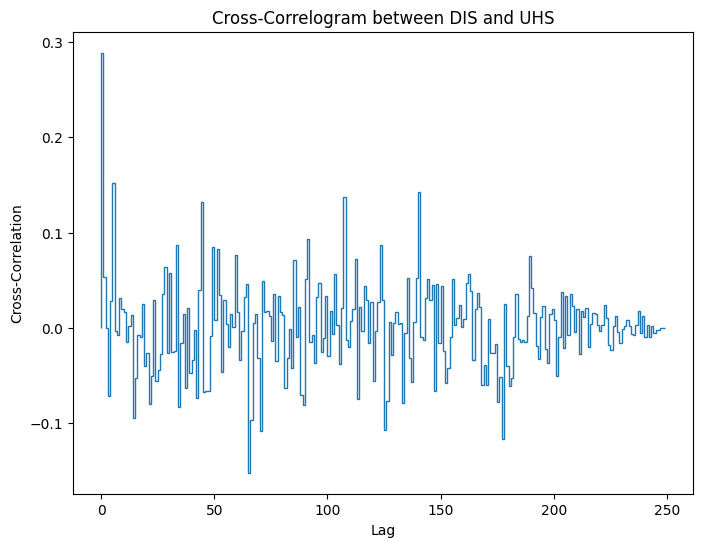

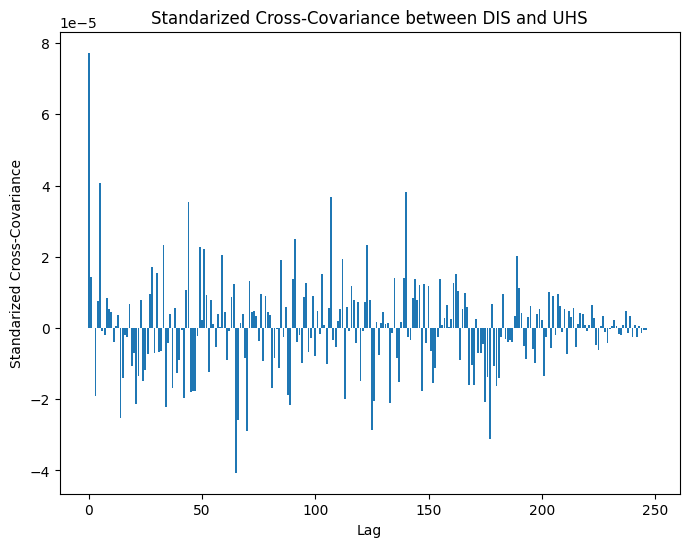

In [11]:
from statsmodels.tsa.stattools import ccf,ccovf
import itertools

stocks_pairs = list(itertools.combinations(tickers, 2))
print(len(stocks_pairs))

def cross_correlogram_two_stocks(stocks):
    stock1,stock2 = stocks
    cross_correlogram = ccf(daily_returns_stocks[stock1].dropna(),daily_returns_stocks[stock2].dropna(),adjusted=False)
    
    # Plot cross-correlogram
    plt.figure(figsize=(8, 6))
    plt.stairs(cross_correlogram)
    plt.title(f'Cross-Correlogram between {stock1} and {stock2}')
    plt.xlabel('Lag')
    plt.ylabel('Cross-Correlation')
    plt.show()
    
def cross_covariance_two_stocks(stocks):
    stock1,stock2 = stocks
    cross_correlogram = ccovf(daily_returns_stocks[stock1].dropna(),daily_returns_stocks[stock2].dropna(),adjusted=False)
    
    # Plot cross-correlogram
    plt.figure(figsize=(8, 6))
    plt.bar(range(len(cross_correlogram)), cross_correlogram)
    plt.title(f'Standarized Cross-Covariance between {stock1} and {stock2}')
    plt.xlabel('Lag')
    plt.ylabel('Standarized Cross-Covariance')
    plt.show()
    

cross_correlogram_two_stocks(stocks_pairs[0])
cross_covariance_two_stocks(stocks_pairs[0])

# Vector AutoRegressive VAR(1) Model 